In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import tensorflow
import keras 
from keras.layers import Dense,Dropout,BatchNormalization
from keras import layers

2024-02-09 02:43:31.451211: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 02:43:31.451344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 02:43:31.622286: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
apple_data=pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')#importing data from csv file

# **Know about Data**
![](https://i.pinimg.com/564x/cc/23/9a/cc239a466cae17b8af98402e70b2ae9a.jpg)

In [3]:
apple_data.head(5) #printing first 5 tuples from the dataset


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
apple_data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [5]:
apple_data.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [6]:
# apple_data.dropna()
# apple_data.isna().sum()
# droped.isna().sum()
x=apple_data.dropna()

In [7]:
x.isna().sum()
apple_data=x

In [8]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


Let's **Visualize Our Data:**

->Can be used to know the patterns within the data

->Relationships Existing in the data

->Estimate whether our data is biased or not

![](https://i.pinimg.com/564x/7d/25/48/7d2548a11fdee2c9fafc868f9700f03d.jpg)

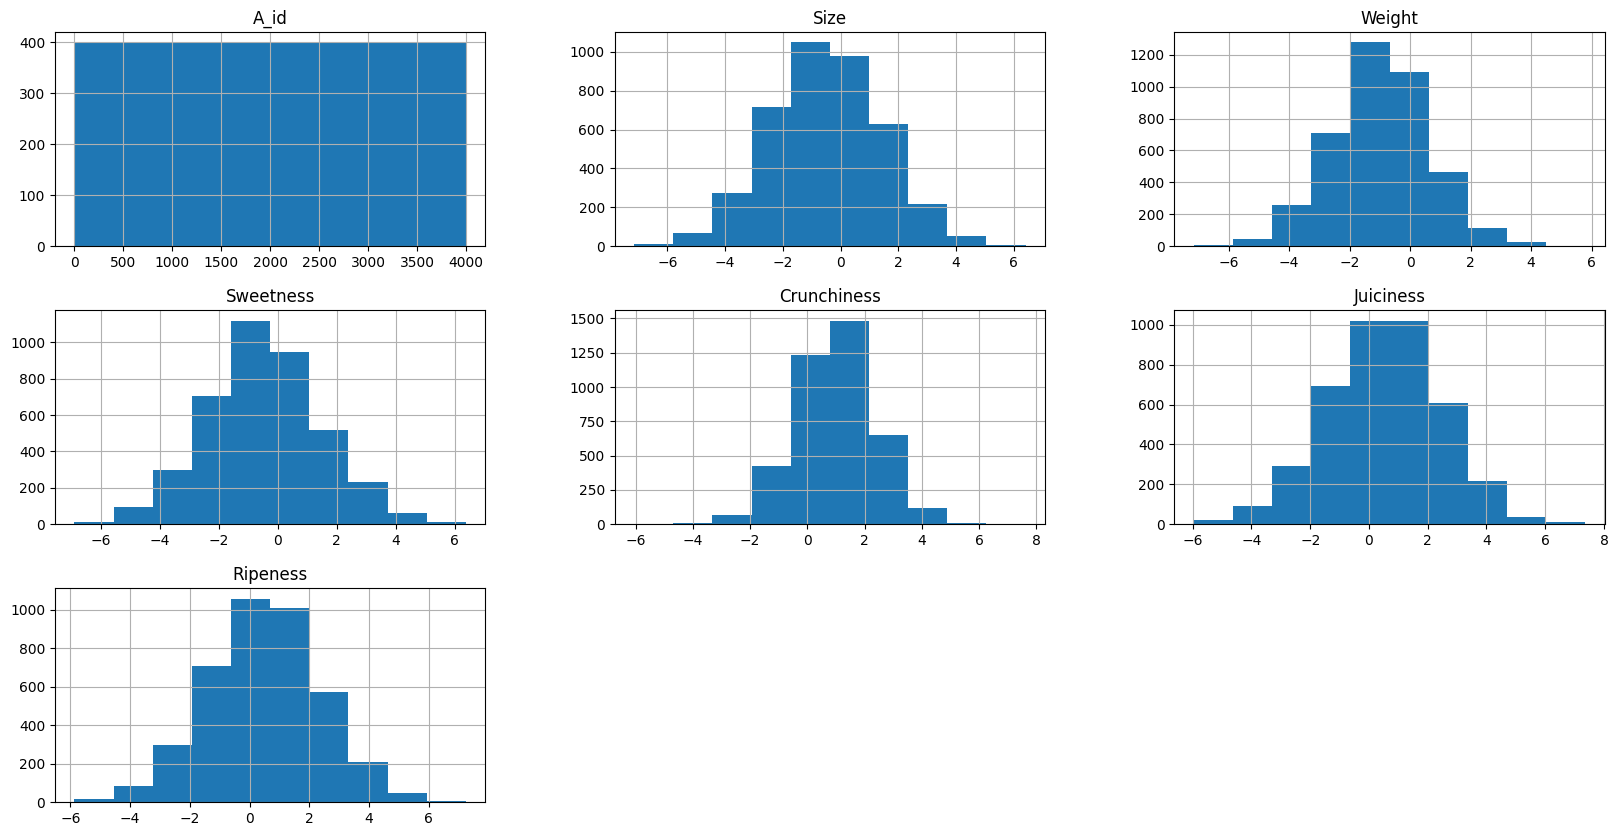

In [9]:
plt.rcParams['figure.figsize']=[20,10]
apple_data.hist()
plt.show()

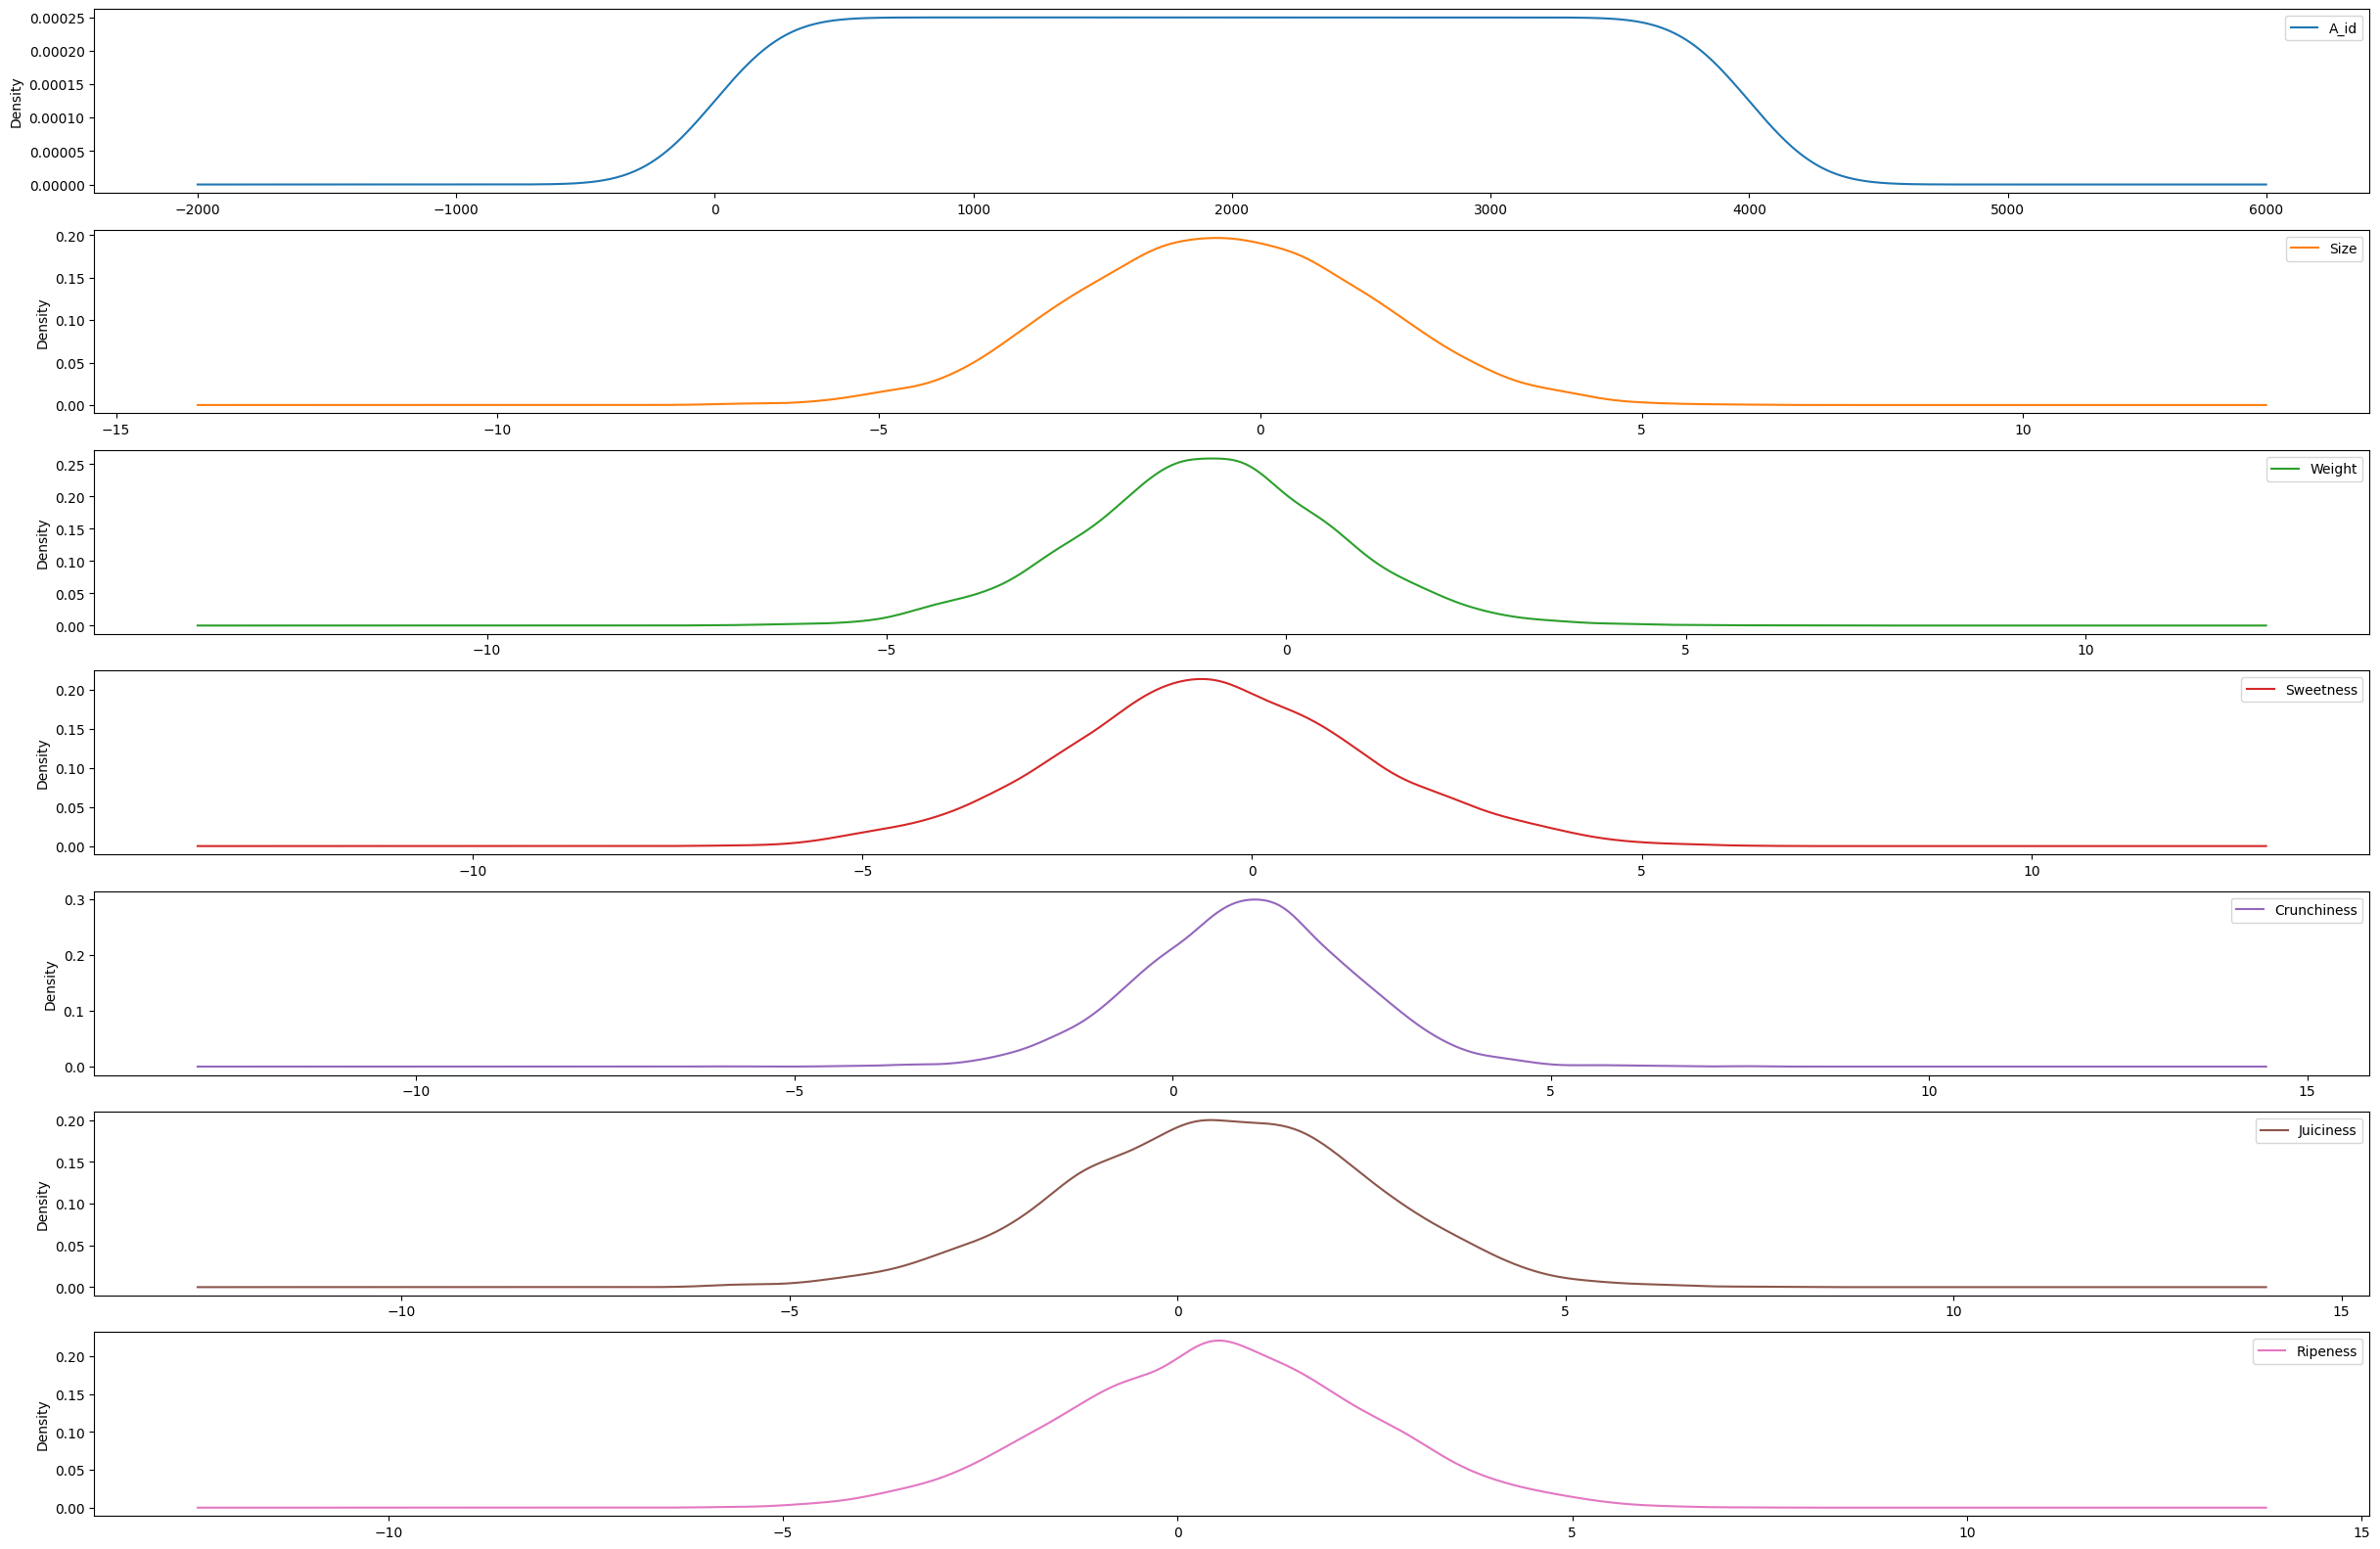

In [10]:
plt.rcParams['figure.figsize']=[30,20]
apple_data.plot(kind='density',subplots=True,sharex=False)
plt.show()

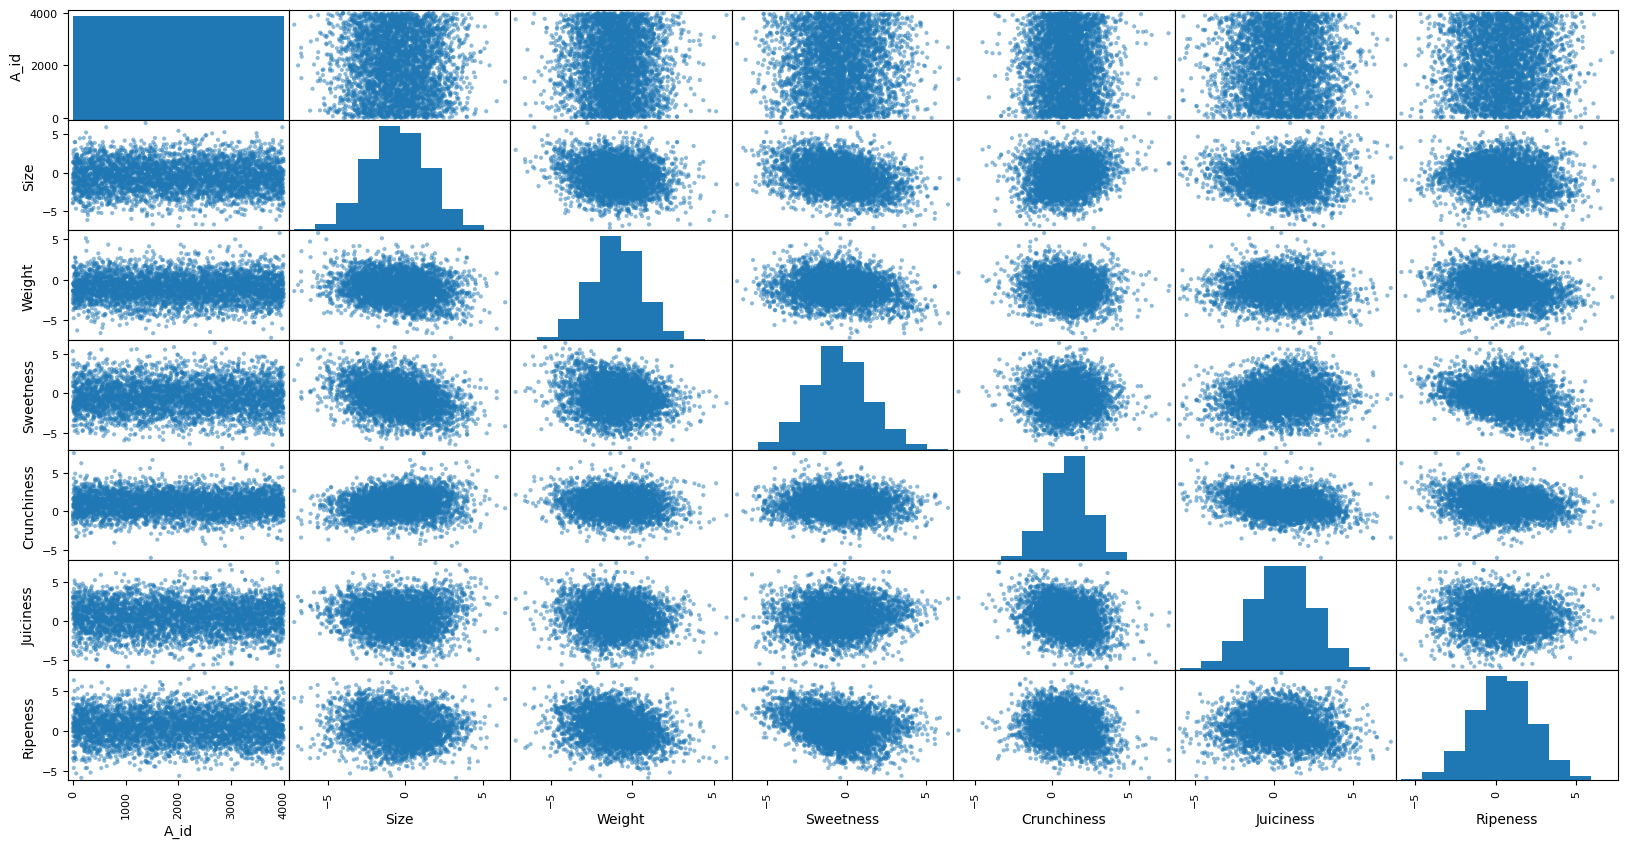

In [11]:
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize']=[20,10]
scatter_matrix(apple_data)
plt.show()

In [12]:
# apple_data['Quality']=apple_data['Quality'].map({
#     "good":1,"bad":0
# })

In [13]:
apple_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [14]:
apple_data['Quality']=apple_data['Quality'].astype(str)
apple_data['Quality']=apple_data['Quality'].map({
    "good":1,"bad":0
})

In [15]:
unique_values = apple_data['Quality'].unique()
print(unique_values)


[1 0]


In [16]:
# # Define the mapping
# quality_mapping = {"good": 1, "bad": 0}

# # Map values in the 'Quality' column using the mapping and fill NaN with -1
# apple_data['Quality'] = apple_data['Quality'].map(quality_mapping).fillna(-1)


In [17]:
apple_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


Data type: <class 'pandas.core.frame.DataFrame'>
Coreelation matrix:
                  A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.028911 -0.005730  -0.002378    -0.013111   0.006179   
Size        -0.028911  1.000000 -0.170702  -0.324680     0.169868  -0.018892   
Weight      -0.005730 -0.170702  1.000000  -0.154246    -0.095882  -0.092263   
Sweetness   -0.002378 -0.324680 -0.154246   1.000000    -0.037552   0.095882   
Crunchiness -0.013111  0.169868 -0.095882  -0.037552     1.000000  -0.259607   
Juiciness    0.006179 -0.018892 -0.092263   0.095882    -0.259607   1.000000   
Ripeness     0.000742 -0.134773 -0.243824  -0.273800    -0.201982  -0.097144   
Acidity     -0.022237  0.196218  0.016414   0.085999     0.069943   0.248714   
Quality      0.004875  0.244007  0.001421   0.250998    -0.012376   0.260223   

             Ripeness   Acidity   Quality  
A_id         0.000742 -0.022237  0.004875  
Size        -0.134773  0.196218  0.244007

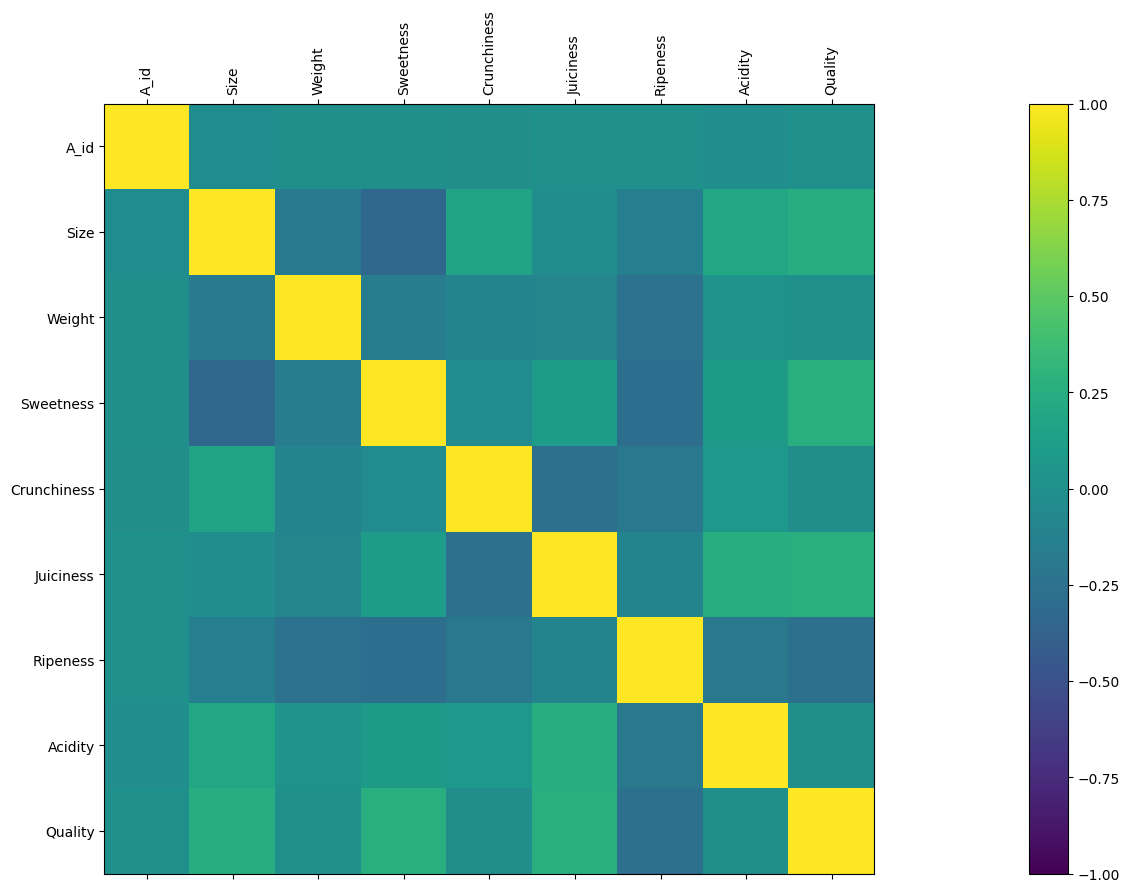

In [18]:
# apple_data['Quality']=apple_data['Quality'].map({
#     "good":1,"bad":0
# })
plt.rcParams['figure.figsize']=[40,10]
correlation = apple_data.corr(method = 'pearson')
print('Data type:', type(correlation))
print('Coreelation matrix:\n', correlation)
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

columnnames=apple_data.columns
ax.set_xticklabels(columnnames,rotation=90)
ax.set_yticklabels(columnnames)
plt.show()

In [19]:
apple_data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

**Let's scale the data**

In [20]:
# ar=apple_data.values
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
x=ar[:,0:7]
y=ar[:,8]

NameError: name 'ar' is not defined

In [ ]:
print(x)

In [ ]:
#scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
rescaled=scaler.fit_transform(x)
print(rescaled[0:5,:])

In [ ]:
print(x)
print("Hello,here is output")
print(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)
input_shape=[x_train.shape[1]]
print(input_shape)

In [ ]:
x_train = np.array(x_train, dtype='float32')
x_test = np.array(x_test,dtype='float32')

# Ensure y_train and y_test are NumPy arrays
y_train = np.array(y_train,dtype='float32')
y_test = np.array(y_test,dtype='float32')

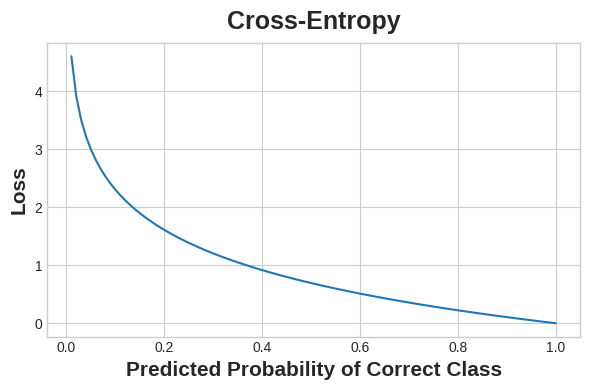

**Building a model**

In [ ]:
#building the model
model=keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(units=256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=1,activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(
optimizer='adam',
    loss='binary_crossentropy',
    metrics='binary_accuracy'
)

In [ ]:
early_stopping=keras.callbacks.EarlyStopping(
patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

In [ ]:
history=model.fit(
x_train,y_train,
    validation_data=(x_test,y_test),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping]
)

In [ ]:
history_df=pd.DataFrame(history.history)
plt.rcParams['figure.figsize']=[10,10]
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot()
plt.show()

In [ ]:
model.save('apple_model.hdf5')

In [ ]:
y_pred=model.predict(x_test)
y_pred=y_pred.round()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()